**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [10]:
# Write your code here
%load_ext autoreload
%autoreload all
import numpy as np
from types import SimpleNamespace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [11]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1
par.w = 1.0

In [12]:
# write you answer here


**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [13]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [14]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [15]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


### Comments ###

 - Each career choice is has an increasing value, of 1, 2 and 3. The error terms gives slight variation, but it is still expected for career 3 to have the highest utility

In [16]:
# write your answer here

import sympy as sm
import scipy as sp
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import optimize
from scipy import interpolate

np.random.seed(2024) # define a seed, so we can replicate simulate error term
epsilon = np.random.normal(0, par.sigma, (par.J, par.N, par.K)) # simulation with mean 0 and given sigma of 2. We have 3 careers, 10 people and 10000 repetitions.
mean_of_career = np.mean(np.mean(epsilon, axis=1), axis=1) # find the mean of each career, so we get 3 lists of 10 people.

for (i, k) in zip(par.v, mean_of_career): # summarize the results for each career.
    print("The expected utility of career choice " + str(np.sum(i)) + " is: " + str(np.sum(k+i))) # summarize each career value with the error term


The expected utility of career choice 1 is: 1.007266456171135
The expected utility of career choice 2 is: 2.0001131802759606
The expected utility of career choice 3 is: 3.008498923736292


### Conclusion ###

- We see career choice 3 has the highest utility

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

## Comments ##
 - Each friend has an error term given by epsilon_f, that is normally distributed with mean 0 and the same sigma as previously.

 - We notice the friends have their own error term, that also impacts on the graduates own utility + the graduates own additional error term
 
 - This means when we iterate over par.N friends, each graduate has par.N+1 more friends than the latter graduate
 
 - The first graduate only has one friend in each career and the last graduate has 10 friends in each career. The notation implies they share friends though, that graduate 1 has one friend, graduate 2 has the same friend as graduate 1 + one more, and so on. 
 
 - Then their prior utility is calculated, and at last their chosen career track of which gives the highest yield, given the mean of their friends.

Chosen career for graduate 1 is career 1. Expected utility is 4.34, the ex ante utility is 2.86
Chosen career for graduate 2 is career 2. Expected utility is 2.07, the ex ante utility is 1.62
Chosen career for graduate 3 is career 3. Expected utility is 3.27, the ex ante utility is 1.81
Chosen career for graduate 4 is career 2. Expected utility is 3.39, the ex ante utility is 2.46
Chosen career for graduate 5 is career 2. Expected utility is 3.65, the ex ante utility is 1.33
Chosen career for graduate 6 is career 3. Expected utility is 3.52, the ex ante utility is 3.01
Chosen career for graduate 7 is career 3. Expected utility is 4.23, the ex ante utility is 6.57
Chosen career for graduate 8 is career 3. Expected utility is 1.97, the ex ante utility is 4.52
Chosen career for graduate 9 is career 3. Expected utility is 3.35, the ex ante utility is 2.35
Chosen career for graduate 10 is career 3. Expected utility is 1.9, the ex ante utility is 1.48


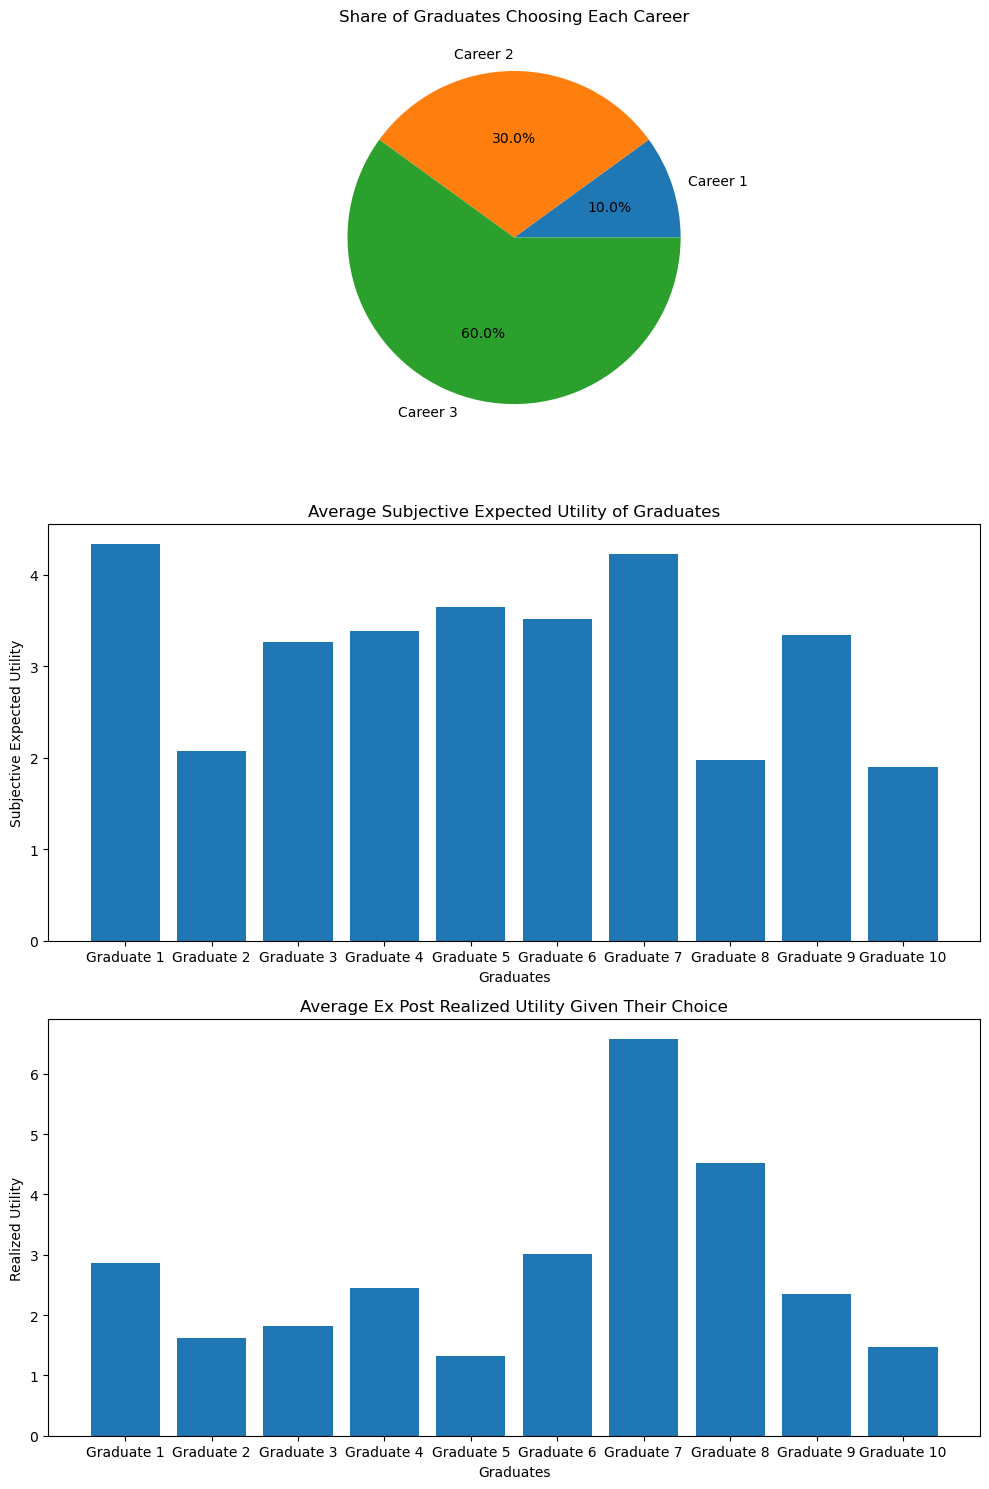

In [75]:
# Write your answer here 

np.random.seed(2024)

epsilon_friends = np.random.normal(0, par.sigma, (par.N, max(np.arange(1, par.N+1)), par.J)) # simulate error term for each friend
prior_utility_graduate = np.zeros((par.N, par.J)) # define array for prior utility
realized_utility = np.zeros(par.N) # define array for realized utility
career_choice = np.zeros(par.N, dtype=int) # define int, since append will be int.

for i in range(par.N): # iterate over each graduate = 10
    F_i = i + 1  # Number of friends that graduate i has. + 1 friend in each career for each iteration of the loop.
    utility_friends = par.v + epsilon_friends[i, :F_i] # calculates utility for each friend
    prior_utility_graduate[i, :] = np.mean(utility_friends, axis=0) # calculate prior expectations
    error_graduate = np.random.normal(0, par.sigma, par.J) # add new noise term for each graduate
    utility_graduate = par.v + error_graduate # calculate graduate utility
    career_choice[i] = np.argmax(prior_utility_graduate[i, :]) # find max value of utility in list
    realized_utility[i] = utility_graduate[career_choice[i]] # show their actual utility for each career

for i in range(0,len(career_choice)): # prints out the career choice and utility for each graduate
    print("Chosen career for graduate " + str(i+1) + " is career " + str(career_choice[i]+1) + ". Expected utility is " + str(round(np.max(prior_utility_graduate[i]),2)) + ", the ex ante utility is " + str(round(realized_utility[i], 2)))

career_proportions = np.zeros(par.J) # define array for career shares
for j in range(par.J): # calculate share of graduates choosing each career
    career_proportions[j] = np.sum(career_choice == j) / par.N

# Calculate average subjective expected utility and average ex post realized utility
average_subjective_utility = np.mean(prior_utility_graduate[np.arange(par.N), career_choice]) # find average subjective utility
average_realized_utility = np.mean(realized_utility) # find average realized utility 

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 15))


axs[0].pie(career_proportions, labels=[f'Career {j+1}' for j in range(par.J)],autopct='%1.1f%%') # pie chart of career proportions
axs[0].set_title('Share of Graduates Choosing Each Career')

# Average subjective expected utility
axs[1].bar(np.arange(1, par.N+1), prior_utility_graduate[np.arange(par.N), career_choice], tick_label=[f'Graduate {i+1}' for i in range(par.N)])
axs[1].set_title('Average Subjective Expected Utility of Graduates')
axs[1].set_xlabel('Graduates')
axs[1].set_ylabel('Subjective Expected Utility')

# Average ex post realized utility
axs[2].bar(np.arange(1, par.N+1), realized_utility, tick_label=[f'Graduate {i+1}' for i in range(par.N)])
axs[2].set_title('Average Ex Post Realized Utility Given Their Choice')
axs[2].set_xlabel('Graduates')
axs[2].set_ylabel('Realized Utility')

plt.tight_layout()
plt.show()

### Conclusion ###

 - The pie chart shows a distribution of 10% career 1, 30% career 2 and 40% career 3.

 - The  outlier for career 1 is because of the high expectation given from his single friend from career 1, as seen on the expected utility. This results in 

 - For each graduate increase in friends, we expect the deviation to go away and the true nature of career 3 with the highest utility is to be expected.

 - The graduates own error term can also weigh high. For graduate 7 it can be seen, with a very high ex ante utility of 6.57, although his expectations are defined by his friends choice.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

[1 2]
[4.33609464 3.47469545]
[0 2]
[-0.40307551  1.69817611]
[0 1]
[1.83210361 3.32065927]
[0 2]
[-5.239924   -0.65058914]
[0 2]
[0.91997724 2.20410329]
[0 1]
[2.10710556 4.24808522]
[0 1]
[-3.00127004  0.44433662]
[0 1]
[2.38799004 2.72363065]
[0 1]
[-0.83409209  0.50092717]
[0 1]
[ 1.88735471 -0.53262128]


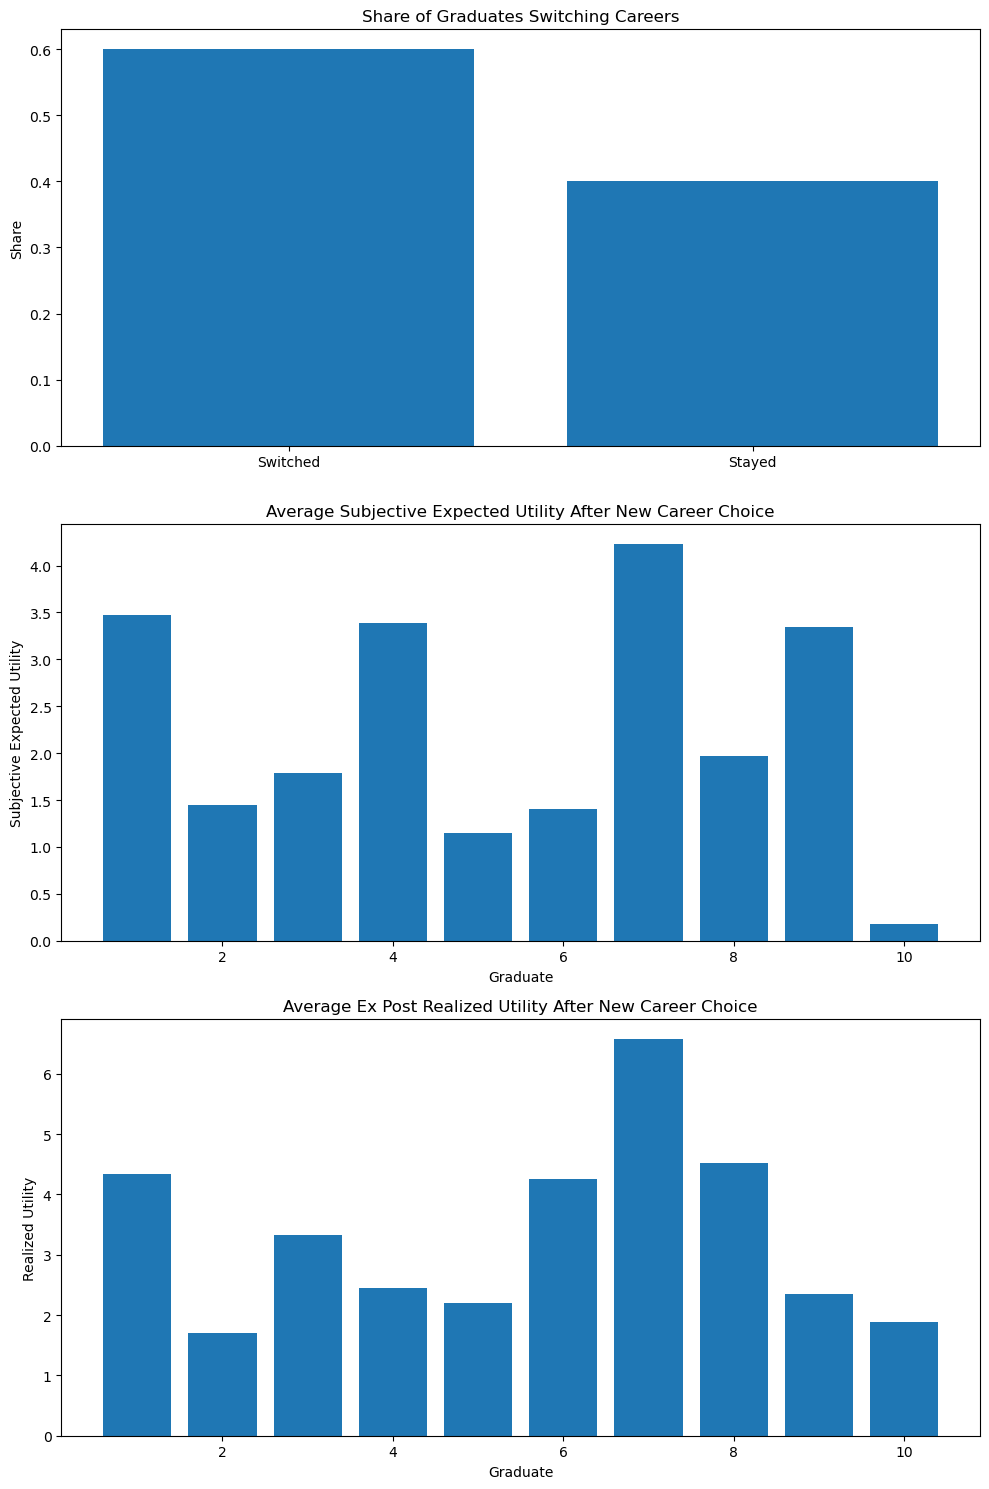

3.3588959184729212


In [47]:
# write your answer here
np.random.seed(2024)

new_career_choice = np.zeros(par.N, dtype=int) # define array for which new career they choose
new_realized_utility = np.zeros(par.N)
switch_decision = np.zeros(par.N, dtype=bool) # if they switch career, it will be true

for i in range(par.N):
    initial_career = career_choice[i] # initial career choice
    initial_utility = realized_utility[i] # initial utility
    remaining_careers = np.setdiff1d(np.arange(par.J), initial_career) # find the remaining careers that graduate didn't pick
    new_utilities_with_cost = par.v[remaining_careers] - par.c + np.random.normal(0, par.sigma, len(remaining_careers)) # calculate new utility with cost of -1 for c
    
    if initial_utility >= np.max(new_utilities_with_cost): # logic comparison to see if they should switch career
        new_career_choice[i] = initial_career # insert the same value as before
        new_realized_utility[i] = initial_utility # same here
        switch_decision[i] = False
    else:
        new_career_choice[i] = remaining_careers[np.argmax(new_utilities_with_cost)] # the career with highest utility gets chosen
        new_realized_utility[i] = new_utilities_with_cost[np.argmax(new_utilities_with_cost)] # and corresponding utility
        switch_decision[i] = True


shares_switching = np.mean(switch_decision) # calculate shares of graduates switching careers
average_subjective_utility_new = np.mean([prior_utility_graduate[i, new_career_choice[i]] for i in range(par.N)]) # calculate average subjective utility
average_realized_utility_new = np.mean(new_realized_utility) # calculate exp post realized utility

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Share of graduates switching careers
axs[0].bar(['Switched', 'Stayed'], [shares_switching, 1 - shares_switching])
axs[0].set_title('Share of Graduates Switching Careers')
axs[0].set_ylabel('Share')

# Average subjective expected utility
axs[1].bar(np.arange(1, par.N+1), [prior_utility_graduate[i, new_career_choice[i]] for i in range(par.N)])
axs[1].set_title('Average Subjective Expected Utility After New Career Choice')
axs[1].set_xlabel('Graduate')
axs[1].set_ylabel('Subjective Expected Utility')

# Average ex post realized utility
axs[2].bar(np.arange(1, par.N+1), new_realized_utility)
axs[2].set_title('Average Ex Post Realized Utility After New Career Choice')
axs[2].set_xlabel('Graduate')
axs[2].set_ylabel('Realized Utility')

plt.tight_layout()
plt.show()

print(average_realized_utility_new)

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [20]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [21]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [22]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [23]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [24]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [25]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [26]:
# write your answer here